In [87]:
import pandas as pd
import pandas.tseries
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np 
plt.rcParams.update({'font.size': 22})
from statsmodels.tsa.arima_model import ARIMA
from numpy import sqrt
from sklearn.metrics import mean_squared_error

In [6]:
imm = pd.read_excel('Data/Total_immigration_by_year.xlsx') 
imm.set_index('Year', inplace = True) #set index as year
imm.index= imm.index.astype(str) #change to str for date time format
imm.index = pd.to_datetime(imm.index)
by_year_df = pd.read_csv('pop_all.csv')
by_year_df.index= imm.index
total_immigration = by_year_df['Pop_Perc'].to_frame()
# total_immi
# by_year_df.head()
data = by_year_df

In [7]:
#checking for stationarity 
from statsmodels.tsa.vector_ar.vecm import coint_johansen
coint_johansen(data,-1,1).eig

array([0.10437947, 0.05137772, 0.03326531, 0.00154877])

In [8]:
#creating the train and validation set
train = data[:int(0.8*(len(data)))]
valid = data[int(0.8*(len(data))):]

#fit the model
from statsmodels.tsa.vector_ar.var_model import VAR

model = VAR(endog=train)
model_fit = model.fit()

# make prediction on validation
prediction = model_fit.forecast(model_fit.y, steps=len(valid))

/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


In [84]:
#converting predictions to dataframe
cols = data.columns
pred = pd.DataFrame(index=range(0,len(prediction)),columns=[cols])
for j in range(0,4):
    for i in range(0, len(prediction)):
       pred.iloc[i][j] = prediction[i][j]

#check rmse
for i in cols:
    print('RMSE value for', i, 'is : ', round(sqrt(mean_squared_error(pred[i], valid[i])), 2))

RMSE value for Number is :  402627.5
RMSE value for Population (in thousands) is :  20887.39
RMSE value for Real GDP per capita (year 2012 dollars) is :  4364.17
RMSE value for Pop_Perc is :  0.0


In [86]:
#converting predictions to dataframe
cols = data.columns
pred = pd.DataFrame(index=range(0,len(prediction)),columns=[cols])
for j in range(0,4):
    for i in range(0, len(prediction)):
       pred.iloc[i][j] = prediction[i][j]

#check rmse
for i in cols:
    print('MAPE value for', i, 'is : ', round(sqrt(mean_absolute_percentage_error(pred[i], valid[i])),2))

MAPE value for Number is :  5.72
MAPE value for Population (in thousands) is :  4.17
MAPE value for Real GDP per capita (year 2012 dollars) is :  4.66
MAPE value for Pop_Perc is :  8.15


In [80]:
def mean_absolute_percentage_error(y_pred, y_true): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [33]:
#make final predictions
model = VAR(endog=data)
model_fit = model.fit()
yhat10 = model_fit.forecast(model_fit.y, steps=10)
print(yhat10)

[[1.14825235e+06 3.28964909e+05 5.60944896e+04 3.54300910e-03]
 [1.16842521e+06 3.31966976e+05 5.68185645e+04 3.61857882e-03]
 [1.18785200e+06 3.34988931e+05 5.75457638e+04 3.68611738e-03]
 [1.20667264e+06 3.38030561e+05 5.82764351e+04 3.74701524e-03]
 [1.22500472e+06 3.41091704e+05 5.90108736e+04 3.80243657e-03]
 [1.24294709e+06 3.44172238e+05 5.97493308e+04 3.85335590e-03]
 [1.26058280e+06 3.47272077e+05 6.04920216e+04 3.90058883e-03]
 [1.27798166e+06 3.50391164e+05 6.12391296e+04 3.94481786e-03]
 [1.29520233e+06 3.53529466e+05 6.19908127e+04 3.98661400e-03]
 [1.31229413e+06 3.56686972e+05 6.27472068e+04 4.02645488e-03]]


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


array([[1.14825235e+06, 3.28964909e+05, 5.60944896e+04, 3.54300910e-03]])

In [27]:
data.columns

Index(['Number', 'Population (in thousands)',
       'Real GDP per capita (year 2012 dollars)', 'Pop_Perc'],
      dtype='object')

In [22]:
data_viz = data.drop(columns=['Number'])

In [23]:
data_viz.head() 

,Population (in thousands),Real GDP per capita (year 2012 dollars),Pop_Perc
Year,,,
1820-01-01,9618.0,1700.17,0.000872
1821-01-01,9899.0,1739.84,0.000922
1822-01-01,10189.0,1754.32,0.000678
1823-01-01,10488.0,1765.97,0.000606
1824-01-01,10795.0,1817.49,0.000733


In [43]:
data_viz.tail()

,Population (in thousands),Real GDP per capita (year 2012 dollars),Pop_Perc
Year,,,
2013-01-01,316598.0,52102.03,0.003129
2014-01-01,318953.0,52985.24,0.003187
2015-01-01,321323.0,54109.73,0.003271
2016-01-01,323668.0,54559.61,0.003657
2017-01-01,325983.0,55373.13,0.003458


In [36]:
pred_df = pd.DataFrame(yhat10)
pred_df.drop([0], axis=1, inplace=True)
pred_df.columns = ['Population (in thousands)',
       'Real GDP per capita (year 2012 dollars)', 'Pop_Perc']
pred_df.shape

(10, 3)

In [71]:
# pred_df.index
times = pd.DatetimeIndex(freq='YS', start='2018', periods=10)
# pred_df.index = times
# pred_df.head() 
# times
data['1850':].corr()

,Number,Population (in thousands),Real GDP per capita (year 2012 dollars),Pop_Perc
Number,1.000000,0.525410,0.606153,0.366124
Population (in thousands),0.525410,1.000000,0.968161,-0.502666
Real GDP per capita (year 2012 dollars),0.606153,0.968161,1.000000,-0.372408
Pop_Perc,0.366124,-0.502666,-0.372408,1.000000


In [ ]:
'Population (in thousands)',
       'Real GDP per capita (year 2012 dollars)', 'Pop_Perc'
data_viz.drop('Population (in thousands)', )

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1c1af18630>,
      dtype=object)

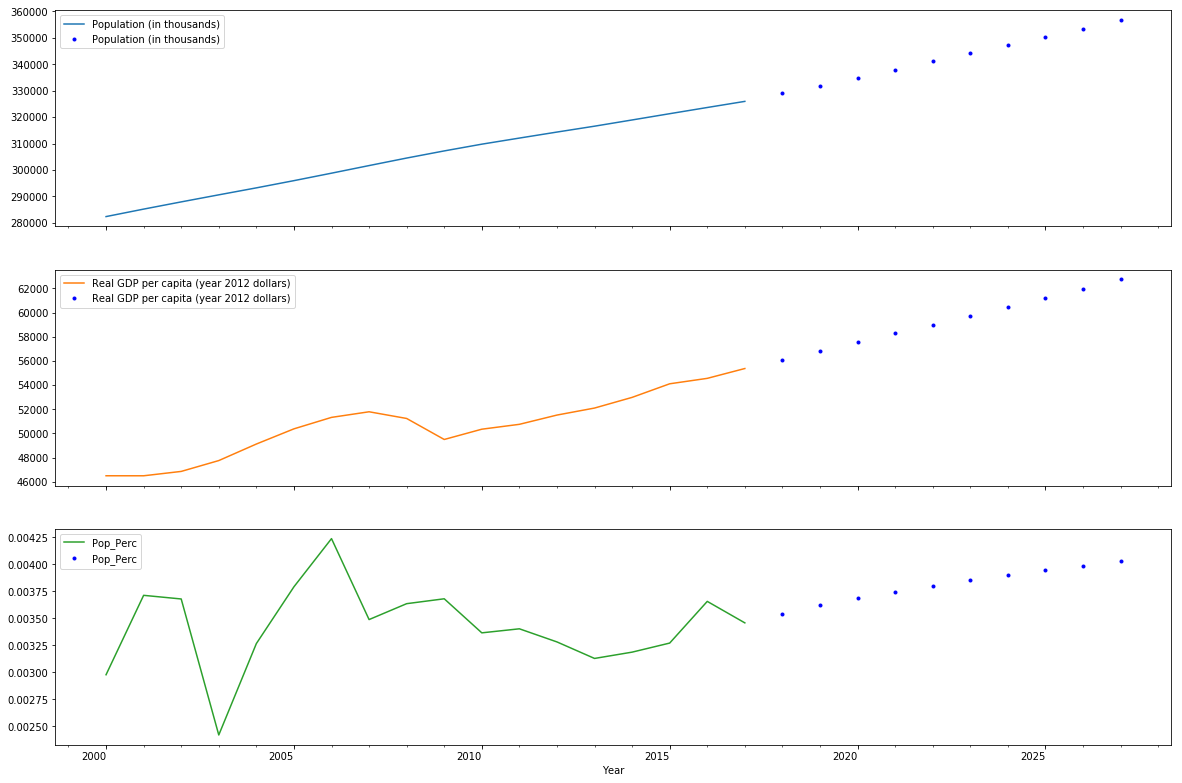

In [72]:
# pred_df_viz = data_viz.append(pred_df)
# pred_df_viz.plot()
ax = data_viz.plot(label='observed', figsize=(20,15), subplots='true')
pred_df.plot(ax=ax, label='forecast', subplots='true', style='b.')


In [66]:
# data_viz = data_viz['2000':]
# test = data_viz.append(pred_df)
pred_df.tail(10)

,Population (in thousands),Real GDP per capita (year 2012 dollars),Pop_Perc
2018-01-01,328964.908574,56094.489631,0.003543
2019-01-01,331966.975811,56818.564461,0.003619
2020-01-01,334988.930611,57545.763805,0.003686
2021-01-01,338030.560771,58276.435063,0.003747
2022-01-01,341091.703534,59010.873558,0.003802
2023-01-01,344172.237658,59749.330821,0.003853
2024-01-01,347272.076760,60492.021570,0.003901
2025-01-01,350391.163750,61239.129589,0.003945
2026-01-01,353529.466149,61990.812675,0.003987
2027-01-01,356686.972176,62747.206804,0.004026


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1c1c66bb00>,
      dtype=object)

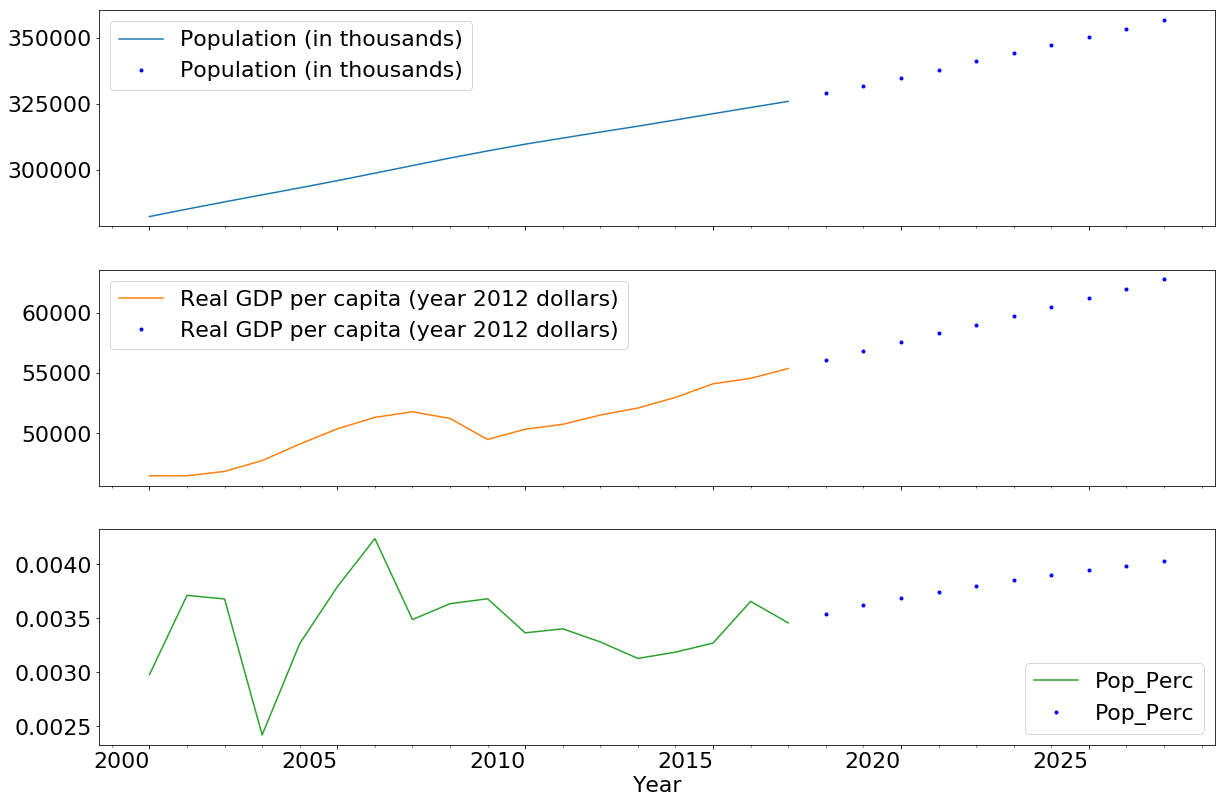

In [88]:
ax = data_viz.plot(label='observed', figsize=(20,15), subplots='true')
pred_df.plot(ax=ax, label='forecast', subplots='true', style='b.')